In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [73]:
mu=5
sigma= 1.5
from scipy.stats import norm
round(norm.cdf(x=3.17,loc=mu,scale=sigma),3)

0.111

In [74]:
density=pd.DataFrame()
density['x']=np.linspace((mu-3*sigma),(mu+3*sigma),100)
density['pdf']=norm.pdf(density['x'],mu,sigma)

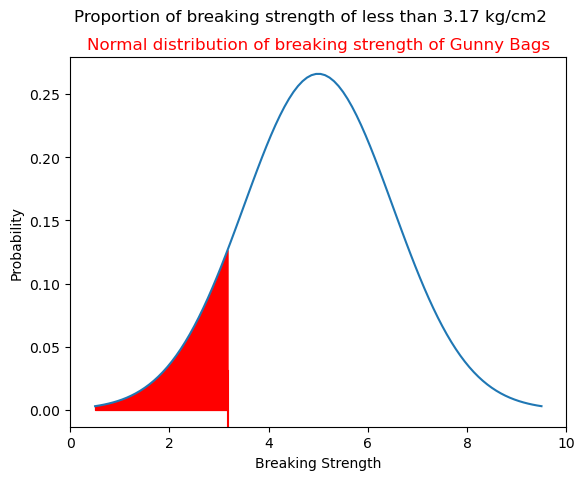

In [75]:
plt.plot(density.x,density.pdf) 
plt.axvline(x=3.17,ymax=0.15,c='r')
x1=np.linspace((5-(1.5*3)),3.17,50)
plt.fill_between(x1,norm.pdf(x1,mu,sigma),color='r')
plt.xlabel('Breaking Strength')
plt.xlim(0,10)
plt.ylabel('Probability')
plt.title('Normal distribution of breaking strength of Gunny Bags',{'fontsize':12,'fontweight':70,'color':'r'})
plt.suptitle('Proportion of breaking strength of less than 3.17 kg/cm2')
plt.show()

In [76]:
1-round(norm.cdf(x=3.6,loc=mu,scale=sigma),3)

0.825

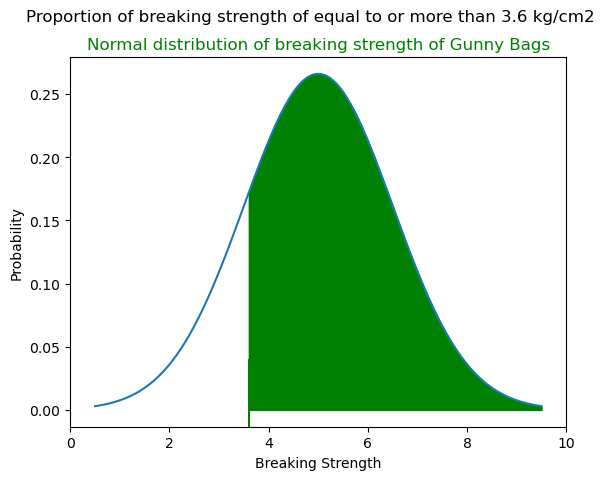

In [77]:
plt.plot(density.x,density.pdf) 
plt.axvline(x=3.6,ymax=0.18,c='g')
x1=np.linspace(3.6,(5+(1.5*3)),50)
plt.fill_between(x1,norm.pdf(x1,mu,sigma),color='g')
plt.xlabel('Breaking Strength')
plt.xlim(0,10)
plt.ylabel('Probability')
plt.title('Normal distribution of breaking strength of Gunny Bags',{'fontsize':12,'fontweight':70,'color':'g'})
plt.suptitle('Proportion of breaking strength of equal to or more than 3.6 kg/cm2')
plt.show()

In [78]:
round(norm.cdf(x=5.5,loc=mu,scale=sigma),3)-round(norm.cdf(x=5,loc=mu,scale=sigma),3)

0.131

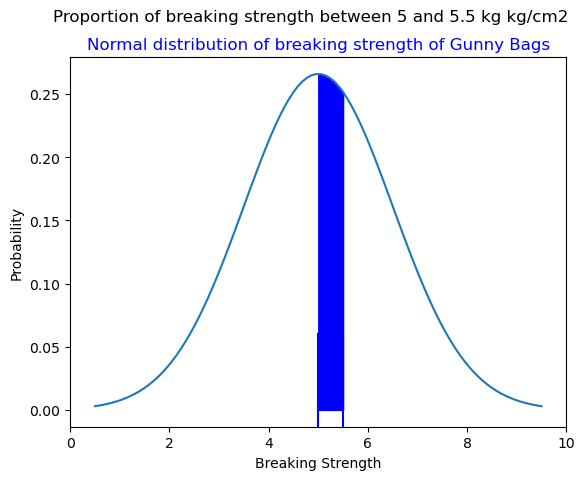

In [79]:
plt.plot(density.x,density.pdf) 
plt.axvline(x=5.5,ymax=0.24,c='b')
plt.axvline(x=5,ymax=0.25,c='b')
x1=np.linspace(5,5.5,50)
plt.fill_between(x1,norm.pdf(x1,mu,sigma),color='b')
plt.xlabel('Breaking Strength')
plt.xlim(0,10)
plt.ylabel('Probability')
plt.title('Normal distribution of breaking strength of Gunny Bags',{'fontsize':12,'fontweight':70,'color':'b'})
plt.suptitle('Proportion of breaking strength between 5 and 5.5 kg kg/cm2') 
plt.show()

In [80]:
round(norm.cdf(x=3,loc=mu,scale=sigma)+(1-norm.cdf(x=7.5,loc=mu,scale=sigma)),3)

0.139

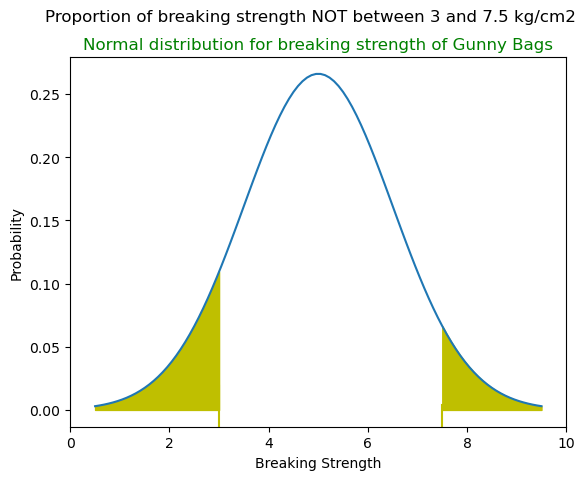

In [81]:
plt.plot(density.x,density.pdf) 
plt.axvline(x=3,ymax=0.11,c='y')
plt.axvline(x=7.5,ymax=0.06,c='y')
x1=np.linspace((5-(1.5*3)),3,50)
plt.fill_between(x1,norm.pdf(x1,mu,sigma),color='y')
x2=np.linspace(7.5,(5+(1.5*3)),50)
plt.fill_between(x2,norm.pdf(x2,mu,sigma),color='y')
plt.xlabel('Breaking Strength')
plt.xlim(0,10)
plt.ylabel('Probability')
plt.title('Normal distribution for breaking strength of Gunny Bags',{'fontsize':12,'fontweight':70,'color':'g'})
plt.suptitle('Proportion of breaking strength NOT between 3 and 7.5 kg/cm2')
plt.show()

**Questions related to Player/Injury & Gunny Bags completed**

## Question related to Zingaro Started

In [82]:
df=pd.read_csv('C:/Users/hp/Desktop/python/Zingaro_Company.csv')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unpolished            75 non-null     float64
 1   Treated and Polished  75 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB


In [84]:
df.head()

,Unpolished,Treated and Polished
0,164.481713,133.209393
1,154.307045,138.482771
2,129.861048,159.665201
3,159.096184,145.663528
4,135.256748,136.789227


In [85]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unpolished,75.0,134.110527,33.041804,48.406838,115.329753,135.597121,158.215098,200.161313
Treated and Polished,75.0,147.788117,15.587355,107.524167,138.268300,145.721322,157.373318,192.272856


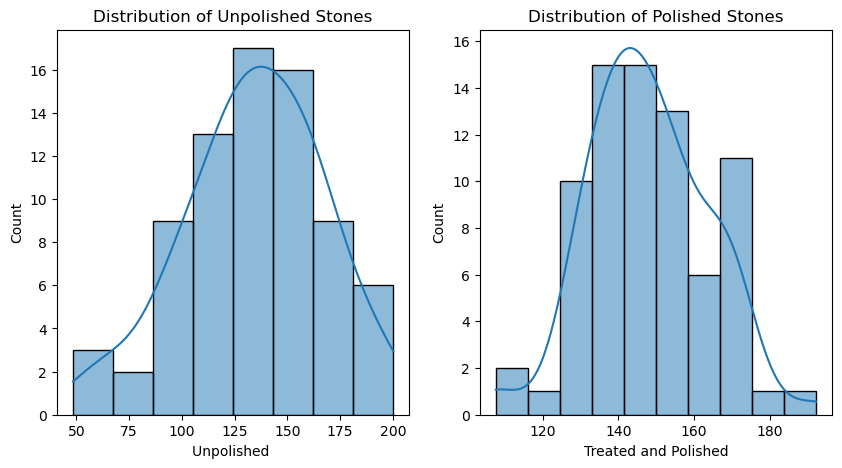

In [86]:
fig,axes=plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,5)
a=sns.histplot(df['Unpolished '],kde=True,ax=axes[0])
a.set_title('Distribution of Unpolished Stones')
a=sns.histplot(df['Treated and Polished'],kde=True,ax=axes[1])
a.set_title('Distribution of Polished Stones');

In [87]:
print(df['Unpolished '].mean())
print(df['Unpolished '].std())

134.11052653373332
33.0418044136061


In [88]:
df['Treated and Polished'].mean()

147.78811718133335

Zingaro stone printing is a company that specializes in printing images or patterns on polished or unpolished stones. However, for the optimum level of printing of the image, the stone surface has to have a Brinell's hardness index of at least 150. Recently, Zingaro has received a batch of polished and unpolished stones from its clients. Use the data provided to answer the following (assuming a 5% significance level);

3.1 Zingaro has reason to believe that the unpolished stones may not be suitable for printing. Do you think Zingaro is justified in thinking so?


"- State the null and alternate hypotheses - Conduct the hypothesis test and compute the p-value - Write down conclusions from the test results Note: Consider the level of significance as 5%."

3.2 Is the mean hardness of the polished and unpolished stones the same?

In [89]:
from scipy.stats import ttest_1samp
t_stats,p_value=ttest_1samp(df['Unpolished '],150,alternative='less')
print('t-statistic',t_stats)
print('p_value',p_value)

t-statistic -4.164629601426757
p_value 4.171286997419652e-05


In [92]:
mu=150
sigma=33.04
t_stats= 134-150/(33.04/np.sqrt(75))
p_value=norm.cdf(t_stats)
print(p_value)
print(t_stats)

1.0
94.6828660509486


In [93]:
from scipy.stats import norm
a=norm.interval(confidence=0.95,loc=df['Unpolished '].mean(),scale=df['Unpolished '].std()/(np.sqrt(75)))
print('Estimated mean Brinell’s Hardness of Unpolished Stone is in range', a)

Estimated mean Brinell’s Hardness of Unpolished Stone is in range (126.63259963321897, 141.58845343424767)


In [94]:
a=norm.interval(confidence=0.95,loc=df['Treated and Polished'].mean(),scale=df['Treated and Polished'].std()/(np.sqrt(75)))
print('Estimated mean Brinell’s Hardness of Polished Stone is in range', a)

Estimated mean Brinell’s Hardness of Polished Stone is in range (144.26043140952547, 151.31580295314123)


**from above we can see that the hardness mean range of Treated and Polished stone lies between 144.26 - 151.31 whereas for Unpolished stones it lies in between 126.63 - 141.59 . However for the optimum level of printing of the imagestone surface has to have a Brinell's hardness index of at least 150. So we clearly see that the the unpolished stones may not be suitable for printing as its hardness index lies between 126.63 - 141.59 which is quite less than the minimum required value i.e. 150**

Null Hypothesis, H0: mu1=mu2
Altenate hypothesis, H1: mu1 is not equal to mu2

In [95]:
from scipy.stats import ttest_ind
t_stats,p_value=ttest_ind(df['Unpolished '],df['Treated and Polished'])

In [96]:
print('t_stats',t_stats)
print('p_value',p_value)

t_stats -3.2422320501414053
p_value 0.0014655150194628353


Since p_value is less than level of significance we strongly reject our Null Hypothesis

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unpolished            75 non-null     float64
 1   Treated and Polished  75 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB


In [ ]:
df['Treated and Polished']

**Question related to Zingaro Completed**

## Question related to Alloy Hardness started

In [98]:
df1=pd.read_excel('C:/Users/hp/Desktop/python/Dental_Hardness.xlsx')

In [99]:
df1.head(5)

,Dentist,Method,Alloy,Temp,Response,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1.0,1.0,1.0,1500.0,813.0,NaN,NaN,Anova: Two-Factor Without Replication,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,1600.0,792.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,1700.0,792.0,NaN,NaN,SUMMARY,Count,Sum,Average,Variance,NaN,NaN
3,1.0,1.0,2.0,1500.0,907.0,NaN,NaN,1,4,2315,578.75,523721.583333,NaN,NaN
4,1.0,1.0,2.0,1600.0,792.0,NaN,NaN,1,4,2394,598.5,584819,NaN,NaN


In [100]:
df1.shape

(107, 14)

In [101]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Dentist      90 non-null     float64
 1   Method       90 non-null     float64
 2   Alloy        90 non-null     float64
 3   Temp         90 non-null     float64
 4   Response     90 non-null     float64
 5   Unnamed: 5   0 non-null      float64
 6   Unnamed: 6   0 non-null      float64
 7   Unnamed: 7   102 non-null    object 
 8   Unnamed: 8   100 non-null    object 
 9   Unnamed: 9   100 non-null    object 
 10  Unnamed: 10  99 non-null     object 
 11  Unnamed: 11  98 non-null     object 
 12  Unnamed: 12  3 non-null      object 
 13  Unnamed: 13  3 non-null      object 
dtypes: float64(7), object(7)
memory usage: 11.8+ KB


In [102]:
df1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Dentist,90.0,NaN,NaN,NaN,3.0,1.422136,1.0,2.0,3.0,4.0,5.0
Method,90.0,NaN,NaN,NaN,2.0,0.821071,1.0,1.0,2.0,3.0,3.0
Alloy,90.0,NaN,NaN,NaN,1.5,0.502801,1.0,1.0,1.5,2.0,2.0
Temp,90.0,NaN,NaN,NaN,1600.0,82.107083,1500.0,1500.0,1600.0,1700.0,1700.0
Response,90.0,NaN,NaN,NaN,741.777778,145.767845,289.0,698.0,767.0,824.0,1115.0
Unnamed: 5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 7,102.0,17.0,1.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 8,100.0,8.0,4.0,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 9,100.0,88.0,2220.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
df1.Dentist=pd.Categorical(df1.Dentist)
df1.Method=pd.Categorical(df1.Method)
df1.Alloy=pd.Categorical(df1.Alloy)
df1.Temp=pd.Categorical(df1.Temp)

In [104]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Dentist      90 non-null     category
 1   Method       90 non-null     category
 2   Alloy        90 non-null     category
 3   Temp         90 non-null     category
 4   Response     90 non-null     float64 
 5   Unnamed: 5   0 non-null      float64 
 6   Unnamed: 6   0 non-null      float64 
 7   Unnamed: 7   102 non-null    object  
 8   Unnamed: 8   100 non-null    object  
 9   Unnamed: 9   100 non-null    object  
 10  Unnamed: 10  99 non-null     object  
 11  Unnamed: 11  98 non-null     object  
 12  Unnamed: 12  3 non-null      object  
 13  Unnamed: 13  3 non-null      object  
dtypes: category(4), float64(3), object(7)
memory usage: 9.5+ KB


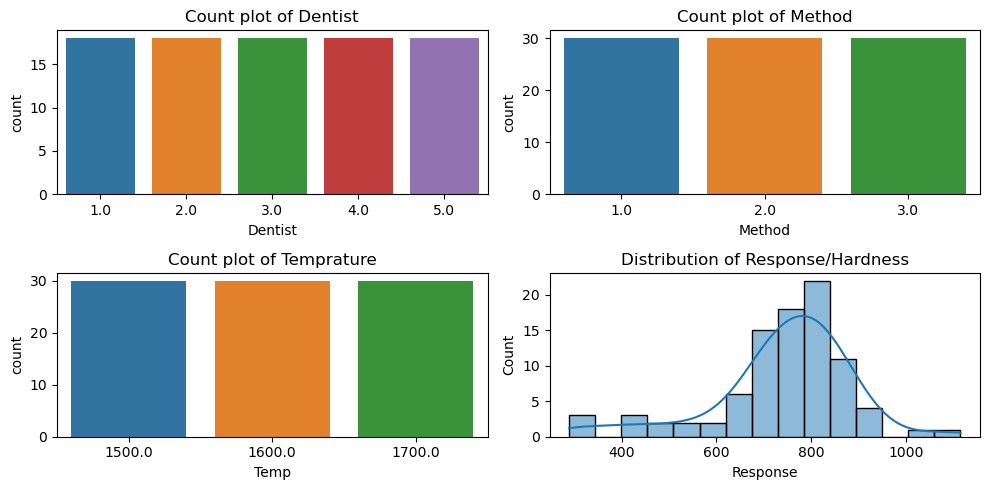

In [105]:
fig,axes=plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,5)

a=sns.countplot(data=df1,x='Dentist',ax=axes[0][0])
a.set_title('Count plot of Dentist')
a=sns.countplot(data=df1,x='Method',ax=axes[0][1])
a.set_title('Count plot of Method')
a=sns.countplot(data=df1,x='Temp',ax=axes[1][0])
a.set_title('Count plot of Temprature')
a=sns.histplot(data=df1,x='Response',kde=True,ax=axes[1][1])
a.set_title('Distribution of Response/Hardness')
fig.tight_layout()
plt.show();

In [106]:
df2=df1[df1.Alloy==1]
df3=df1[df1.Alloy==2]

In [107]:
df2.head()

,Dentist,Method,Alloy,Temp,Response,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1.0,1.0,1.0,1500.0,813.0,NaN,NaN,Anova: Two-Factor Without Replication,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,1600.0,792.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,1700.0,792.0,NaN,NaN,SUMMARY,Count,Sum,Average,Variance,NaN,NaN
6,1.0,2.0,1.0,1500.0,782.0,NaN,NaN,1,4,2410,602.5,540209.666667,NaN,NaN
7,1.0,2.0,1.0,1600.0,698.0,NaN,NaN,1,4,2395,598.75,584420.916667,NaN,NaN


In [108]:
df3.head()

,Dentist,Method,Alloy,Temp,Response,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
3,1.0,1.0,2.0,1500.0,907.0,NaN,NaN,1,4,2315,578.75,523721.583333,NaN,NaN
4,1.0,1.0,2.0,1600.0,792.0,NaN,NaN,1,4,2394,598.5,584819,NaN,NaN
5,1.0,1.0,2.0,1700.0,835.0,NaN,NaN,1,4,2494,623.5,654085.666667,NaN,NaN
9,1.0,2.0,2.0,1500.0,1115.0,NaN,NaN,1,4,2285,571.25,518740.916667,NaN,NaN
10,1.0,2.0,2.0,1600.0,835.0,NaN,NaN,1,4,2301,575.25,574519.583333,NaN,NaN


In [109]:
df3.reset_index(drop=True,inplace=True)

# 4.1

In [110]:
from scipy.stats import shapiro
from scipy.stats import levene
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance,anova_lm

In [111]:
dentist_1= df2[df2.Dentist==1]['Response']
dentist_2= df2[df2.Dentist==2]['Response']
dentist_3= df2[df2.Dentist==3]['Response']
dentist_4= df2[df2.Dentist==4]['Response']
dentist_5= df2[df2.Dentist==5]['Response']
print('For Alloy Type 01 Dentist 1',shapiro(dentist_1))
print('For Alloy Type 01 Dentist 2',shapiro(dentist_2))
print('For Alloy Type 01 Dentist 3',shapiro(dentist_3))
print('For Alloy Type 01 Dentist 4',shapiro(dentist_4))
print('For Alloy Type 01 Dentist 5',shapiro(dentist_5))
print(' ')
print('Dentist',levene(dentist_1,dentist_2,dentist_3,dentist_4,dentist_5))

For Alloy Type 01 Dentist 1 ShapiroResult(statistic=0.9113541841506958, pvalue=0.3254688084125519)
For Alloy Type 01 Dentist 2 ShapiroResult(statistic=0.9642462134361267, pvalue=0.8415456414222717)
For Alloy Type 01 Dentist 3 ShapiroResult(statistic=0.8721169233322144, pvalue=0.12953516840934753)
For Alloy Type 01 Dentist 4 ShapiroResult(statistic=0.8368974328041077, pvalue=0.05333680287003517)
For Alloy Type 01 Dentist 5 ShapiroResult(statistic=0.8534296751022339, pvalue=0.08127813786268234)
 
Dentist LeveneResult(statistic=1.3847146992797106, pvalue=0.2565537418543795)


In [112]:
formula='Response ~ C(Dentist)'
model=ols(formula,df2).fit()
anova_table=anova_lm(model)
print(anova_table)

              df         sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0  106683.688889  26670.922222  1.977112  0.116567
Residual    40.0  539593.555556  13489.838889       NaN       NaN


In [113]:
dentist_1= df3[df3.Dentist==1]['Response']
dentist_2= df3[df3.Dentist==2]['Response']
dentist_3= df3[df3.Dentist==3]['Response']
dentist_4= df3[df3.Dentist==4]['Response']
dentist_5= df3[df3.Dentist==5]['Response']
print('For Alloy Type 02 Dentist 1',shapiro(dentist_1))
print('For Alloy Type 02 Dentist 2',shapiro(dentist_2))
print('For Alloy Type 02 Dentist 3',shapiro(dentist_3))
print('For Alloy Type 02 Dentist 4',shapiro(dentist_4))
print('For Alloy Type 02 Dentist 5',shapiro(dentist_5))
print(' ')
print('For Alloy Type 02 Dentist',levene(dentist_1,dentist_2,dentist_3,dentist_4,dentist_5))

For Alloy Type 02 Dentist 1 ShapiroResult(statistic=0.9039731621742249, pvalue=0.27593979239463806)
For Alloy Type 02 Dentist 2 ShapiroResult(statistic=0.9392004013061523, pvalue=0.5735077857971191)
For Alloy Type 02 Dentist 3 ShapiroResult(statistic=0.9340971112251282, pvalue=0.5213080644607544)
For Alloy Type 02 Dentist 4 ShapiroResult(statistic=0.7613219022750854, pvalue=0.007332688197493553)
For Alloy Type 02 Dentist 5 ShapiroResult(statistic=0.9131584167480469, pvalue=0.33861100673675537)
 
For Alloy Type 02 Dentist LeveneResult(statistic=1.4456166464566966, pvalue=0.23686777576324952)


In [114]:
formula='Response ~ C(Dentist)'
model=ols(formula,df3).fit()
anova_table=anova_lm(model)
print(anova_table)

              df        sum_sq       mean_sq         F    PR(>F)
C(Dentist)   4.0  5.679791e+04  14199.477778  0.524835  0.718031
Residual    40.0  1.082205e+06  27055.122222       NaN       NaN


# 4.2

In [115]:
Method_1= df2[df2.Method==1]['Response']
Method_2= df2[df2.Method==2]['Response']
Method_3= df2[df2.Method==3]['Response']
print('For Alloy Type 01 Method 1',shapiro(Method_1))
print('For Alloy Type 01 Method 2',shapiro(Method_2))
print('For Alloy Type 01 Method 3',shapiro(Method_3))
print(' ')
print('For Alloy Type 01 Methods',levene(Method_1,Method_2,Method_3))

For Alloy Type 01 Method 1 ShapiroResult(statistic=0.9183822870254517, pvalue=0.18198540806770325)
For Alloy Type 01 Method 2 ShapiroResult(statistic=0.9732585549354553, pvalue=0.9030335545539856)
For Alloy Type 01 Method 3 ShapiroResult(statistic=0.9114548563957214, pvalue=0.14254699647426605)
 
For Alloy Type 01 Methods LeveneResult(statistic=6.52140454403598, pvalue=0.0034160381460233975)


In [116]:
formula='Response ~ C(Method)'
model=ols(formula,df2).fit()
anova_table=anova_lm(model)
print(anova_table)

             df         sum_sq       mean_sq         F    PR(>F)
C(Method)   2.0  148472.177778  74236.088889  6.263327  0.004163
Residual   42.0  497805.066667  11852.501587       NaN       NaN


In [117]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [118]:
turkey= pairwise_tukeyhsd(endog=df2.Response,groups=df2.Method,alpha=0.05)
print(turkey)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
   1.0    2.0   -6.1333  0.987  -102.714  90.4473  False
   1.0    3.0    -124.8 0.0085 -221.3807 -28.2193   True
   2.0    3.0 -118.6667 0.0128 -215.2473  -22.086   True
--------------------------------------------------------


In [119]:
Method_1= df3[df3.Method==1]['Response']
Method_2= df3[df3.Method==2]['Response']
Method_3= df3[df3.Method==3]['Response']
print('For Alloy Type 02 Method 1',shapiro(Method_1))
print('For Alloy Type 02 Method 2',shapiro(Method_2))
print('For Alloy Type 02 Method 3',shapiro(Method_3))
print(' ')
print('For Alloy Type 02 Methods',levene(Method_1,Method_2,Method_3))

For Alloy Type 02 Method 1 ShapiroResult(statistic=0.963810384273529, pvalue=0.7582374811172485)
For Alloy Type 02 Method 2 ShapiroResult(statistic=0.755793035030365, pvalue=0.001051110913977027)
For Alloy Type 02 Method 3 ShapiroResult(statistic=0.9021322131156921, pvalue=0.1025901660323143)
 
For Alloy Type 02 Methods LeveneResult(statistic=3.349707184158617, pvalue=0.04469269939158668)


In [120]:
formula='Response ~ C(Method)'
model=ols(formula,df3).fit()
anova_table=anova_lm(model)
print(anova_table)

             df    sum_sq        mean_sq        F    PR(>F)
C(Method)   2.0  499640.4  249820.200000  16.4108  0.000005
Residual   42.0  639362.4   15222.914286      NaN       NaN


In [121]:
turkey=pairwise_tukeyhsd(endog=df3.Response,groups=df3.Method,alpha=0.05)
print(turkey)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj    lower     upper   reject
--------------------------------------------------------
   1.0    2.0     27.0 0.8212  -82.4546  136.4546  False
   1.0    3.0   -208.8 0.0001 -318.2546  -99.3454   True
   2.0    3.0   -235.8    0.0 -345.2546 -126.3454   True
--------------------------------------------------------


In [122]:
df2.Method.unique()
df2.Dentist.unique()

C:\Users\hp\anaconda3\lib\site-packages\IPython\lib\pretty.py:778: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  output = repr(obj)


[1.0, 2.0, 3.0, 4.0, 5.0]
Categories (5, float64): [1.0, 2.0, 3.0, 4.0, 5.0]

# 4.3

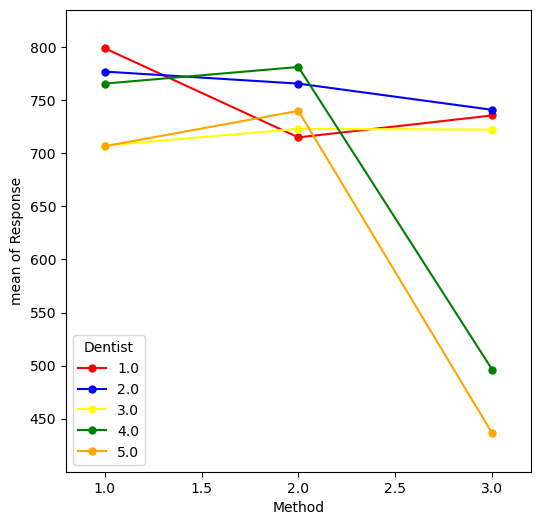

In [123]:
from statsmodels.graphics.factorplots import interaction_plot
fig, ax = plt.subplots(figsize=(6, 6))
fig = interaction_plot(x=df2.Method,trace=df2.Dentist,response=df2.Response,colors=["red", "blue","yellow","green","orange"],ms=10,ax=ax)

In [124]:
formula='Response ~ Dentist:Method'
model=ols(formula,df2).fit()
anova_table=anova_lm(model)
print(anova_table)

                  df         sum_sq       mean_sq         F    PR(>F)
Dentist:Method  14.0  441097.244444  31506.946032  4.606728  0.000221
Residual        30.0  205180.000000   6839.333333       NaN       NaN


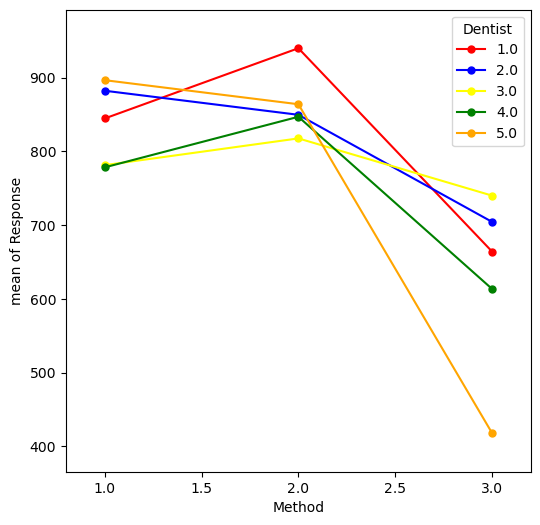

In [125]:
fig, ax = plt.subplots(figsize=(6, 6))
fig = interaction_plot(x=df3.Method,trace=df3.Dentist,response=df3.Response,colors=["red", "blue","yellow","green","orange"],ms=10,ax=ax)

In [126]:
formula='Response ~ Dentist:Method'
model=ols(formula,df3).fit()
anova_table=anova_lm(model)
print(anova_table)

                  df         sum_sq       mean_sq         F    PR(>F)
Dentist:Method  14.0  753898.133333  53849.866667  4.194953  0.000482
Residual        30.0  385104.666667  12836.822222       NaN       NaN


# 4.4

In [127]:
formula='Response ~ Dentist + Method + Dentist:Method'
model=ols(formula,df2).fit()
anova_table=anova_lm(model)
print(anova_table)

                  df         sum_sq       mean_sq          F    PR(>F)
Dentist          4.0  106683.688889  26670.922222   3.899638  0.011484
Method           2.0  148472.177778  74236.088889  10.854287  0.000284
Dentist:Method   8.0  185941.377778  23242.672222   3.398383  0.006793
Residual        30.0  205180.000000   6839.333333        NaN       NaN


In [134]:
turkey= pairwise_tukeyhsd(endog=df2.Response,groups=df2.Method,alpha=0.05)
print(turkey)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
   1.0    2.0   -6.1333  0.987  -102.714  90.4473  False
   1.0    3.0    -124.8 0.0085 -221.3807 -28.2193   True
   2.0    3.0 -118.6667 0.0128 -215.2473  -22.086   True
--------------------------------------------------------


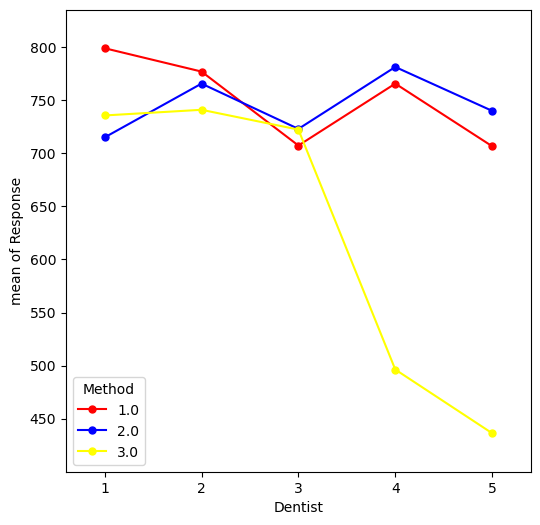

In [128]:
fig, ax = plt.subplots(figsize=(6, 6))
fig = interaction_plot(x=df2.Dentist,trace=df2.Method,response=df2.Response,colors=["red", "blue","yellow"],ms=10,ax=ax)

In [136]:
formula='Response ~ Dentist + Method + Dentist:Method'
model=ols(formula,df3).fit()
anova_table=anova_lm(model)
print(anova_table)

                  df         sum_sq        mean_sq          F    PR(>F)
Dentist          4.0   56797.911111   14199.477778   1.106152  0.371833
Method           2.0  499640.400000  249820.200000  19.461218  0.000004
Dentist:Method   8.0  197459.822222   24682.477778   1.922787  0.093234
Residual        30.0  385104.666667   12836.822222        NaN       NaN
